In [7]:
from sklearn.datasets import load_iris
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [8]:
b = load_iris()

In [9]:
dir(b)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
b

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:

df = pd.DataFrame(b.data,columns=b.feature_names)

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
df["target"] = b.target

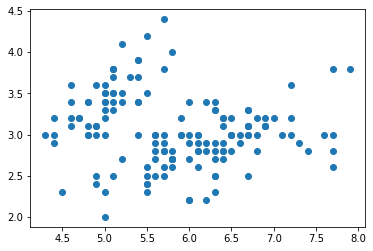

In [14]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

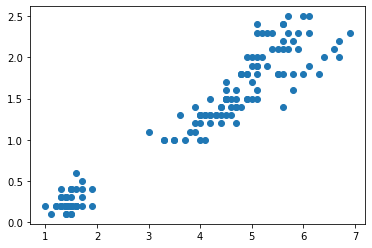

In [15]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])

In [16]:
from sklearn.cluster import KMeans

In [17]:
model = KMeans(n_clusters=3)

In [18]:
result = model.fit_predict(df[['sepal length (cm)','sepal width (cm)']])

In [19]:
df["cluster"] = result

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [21]:
df0 = df[df["cluster"] == 0]
df1 = df[df["cluster"] == 1]
df2 = df[df["cluster"] == 2]

Text(0, 0.5, 'sepal width (cm)')

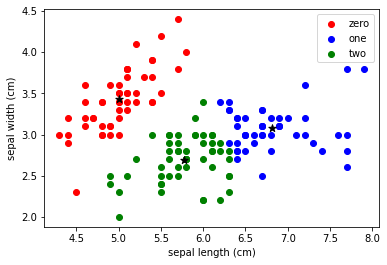

In [22]:
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],color="red",label="zero")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],color="blue",label="one")
plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],color="green",label="two")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*",color="black",s=60)
plt.legend(loc=0)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [23]:
model.cluster_centers_[:,0]

array([5.006     , 6.81276596, 5.77358491])

In [24]:
model.cluster_centers_[:,1]

array([3.428     , 3.07446809, 2.69245283])

Text(0, 0.5, 'sepal width (cm)')

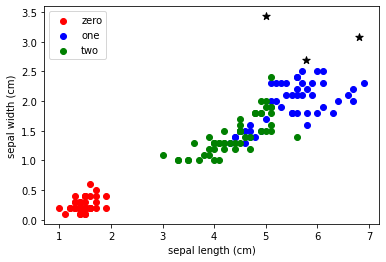

In [25]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="red",label="zero")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",label="one")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green",label="two")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*",color="black",s=60)
plt.legend(loc=0)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
label = MinMaxScaler()

label.fit(df[["petal length (cm)"]])
df["petal length (cm)"]=label.transform(df[["petal length (cm)"]])
label.fit(df[["petal width (cm)"]])
df["petal width (cm)"]=label.transform(df[["petal width (cm)"]])
label.fit(df[["sepal length (cm)"]])
df["sepal length (cm)"]=label.transform(df[["sepal length (cm)"]])
label.fit(df[["sepal width (cm)"]])
df["sepal width (cm)"]=label.transform(df[["sepal width (cm)"]])

In [31]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,0.222222,0.625000,0.067797,0.041667,0,0
1,0.166667,0.416667,0.067797,0.041667,0,0
2,0.111111,0.500000,0.050847,0.041667,0,0
3,0.083333,0.458333,0.084746,0.041667,0,0
4,0.194444,0.666667,0.067797,0.041667,0,0
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,1
146,0.555556,0.208333,0.677966,0.750000,2,2
147,0.611111,0.416667,0.711864,0.791667,2,1
148,0.527778,0.583333,0.745763,0.916667,2,1


Text(0, 0.5, 'sepal width (cm)')

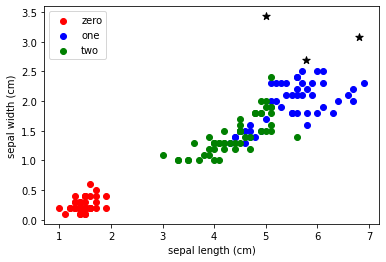

In [32]:
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="red",label="zero")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="blue",label="one")
plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],color="green",label="two")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="*",color="black",s=60)
plt.legend(loc=0)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

In [34]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
sse=[]
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(model.inertia_)

In [35]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.161523409420557,
 0.8538617353912238,
 0.6801035704886194,
 0.5673451458363141,
 0.4875303956743548,
 0.4132667782512474]

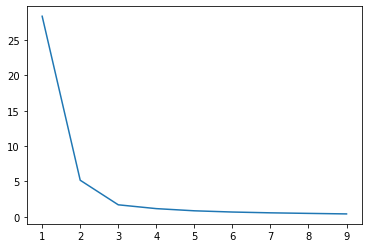

In [36]:
plt.plot(k_rng,sse)